In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df  = pd.read_csv("booking.csv")


In [7]:
df.drop(columns=['Booking_ID'], inplace=True)

In [8]:
df.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [9]:
df.tail()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
36280,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,9/13/2018,Canceled
36281,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
36282,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
36283,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled
36284,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,Online,0,0,0,133.44,3,10/18/2018,Not_Canceled


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number of adults          36285 non-null  int64  
 1   number of children        36285 non-null  int64  
 2   number of weekend nights  36285 non-null  int64  
 3   number of week nights     36285 non-null  int64  
 4   type of meal              36285 non-null  object 
 5   car parking space         36285 non-null  int64  
 6   room type                 36285 non-null  object 
 7   lead time                 36285 non-null  int64  
 8   market segment type       36285 non-null  object 
 9   repeated                  36285 non-null  int64  
 10  P-C                       36285 non-null  int64  
 11  P-not-C                   36285 non-null  int64  
 12  average price             36285 non-null  float64
 13  special requests          36285 non-null  int64  
 14  date o

In [11]:
df.isnull().sum()

number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

In [19]:
df.isnull().sum()/df.shape[0]*100

number of adults            0.0
number of children          0.0
number of weekend nights    0.0
number of week nights       0.0
type of meal                0.0
car parking space           0.0
room type                   0.0
lead time                   0.0
market segment type         0.0
repeated                    0.0
P-C                         0.0
P-not-C                     0.0
average price               0.0
special requests            0.0
date of reservation         0.0
booking status              0.0
dtype: float64

In [21]:
df.duplicated().sum()

10276

In [23]:
for i in df.select_dtypes("object").columns:
    print(df[i].value_counts())
    print("***"*10)

type of meal
Meal Plan 1     27842
Not Selected     5132
Meal Plan 2      3306
Meal Plan 3         5
Name: count, dtype: int64
******************************
room type
Room_Type 1    28138
Room_Type 4     6059
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64
******************************
market segment type
Online           23221
Offline          10531
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64
******************************
date of reservation
10/13/2018    254
10/16/2017    236
6/15/2018     231
6/24/2018     213
9/18/2017     201
             ... 
10/2/2015       1
7/24/2017       1
9/13/2016       1
5/20/2017       1
7/21/2017       1
Name: count, Length: 553, dtype: int64
******************************
booking status
Not_Canceled    24396
Canceled        11889
Name: count, dtype: int64
******************************


In [25]:
for i in df.select_dtypes("object").columns:
    print(df[i].unique())
    print("***"*10)

['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
******************************
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
******************************
['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']
******************************
['10/2/2015' '11/6/2018' '2/28/2018' '5/20/2017' '4/11/2018' '9/13/2016'
 '10/15/2017' '12/26/2018' '7/6/2018' '10/18/2018' '9/11/2018' '4/30/2018'
 '11/26/2018' '11/20/2018' '10/20/2017' '6/15/2018' '10/5/2017'
 '8/10/2017' '10/30/2017' '10/4/2017' '11/25/2018' '3/20/2018'
 '10/13/2018' '5/22/2018' '4/28/2018' '9/21/2017' '5/19/2018' '11/6/2017'
 '9/17/2017' '9/19/2017' '11/13/2018' '12/7/2018' '1/9/2018' '10/7/2018'
 '4/27/2018' '6/19/2018' '10/17/2017' '11/19/2018' '7/30/2018' '11/1/2018'
 '6/21/2018' '4/10/2018' '6/27/2018' '11/18/2017' '12/29/2017'
 '11/20/2017' '4/6/2018' '12/29/2018' '5/30/2018' '4/22/2018' '5/16/2018'
 '11/11/2017' '6/13/2018' '7/28/2018' '4/20/2018' '9/

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number of adults,36285.0,1.844839,0.518813,0.0,2.0,2.00,2.0,4.0
number of children,36285.0,0.105360,0.402704,0.0,0.0,0.00,0.0,10.0
number of weekend nights,36285.0,0.810693,0.870590,0.0,0.0,1.00,2.0,7.0
number of week nights,36285.0,2.204602,1.410946,0.0,1.0,2.00,3.0,17.0
car parking space,36285.0,0.030977,0.173258,0.0,0.0,0.00,0.0,1.0
lead time,36285.0,85.239851,85.938796,0.0,17.0,57.00,126.0,443.0
repeated,36285.0,0.025630,0.158032,0.0,0.0,0.00,0.0,1.0
P-C,36285.0,0.023343,0.368281,0.0,0.0,0.00,0.0,13.0
P-not-C,36285.0,0.153369,1.753931,0.0,0.0,0.00,0.0,58.0
average price,36285.0,103.421636,35.086469,0.0,80.3,99.45,120.0,540.0


In [29]:
df.describe(include="object")

,type of meal,room type,market segment type,date of reservation,booking status
count,36285,36285,36285,36285,36285
unique,4,7,5,553,2
top,Meal Plan 1,Room_Type 1,Online,10/13/2018,Not_Canceled
freq,27842,28138,23221,254,24396


In [31]:
df.select_dtypes("number").columns

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'car parking space', 'lead time', 'repeated',
       'P-C', 'P-not-C', 'average price', 'special requests'],
      dtype='object')

In [33]:
df.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


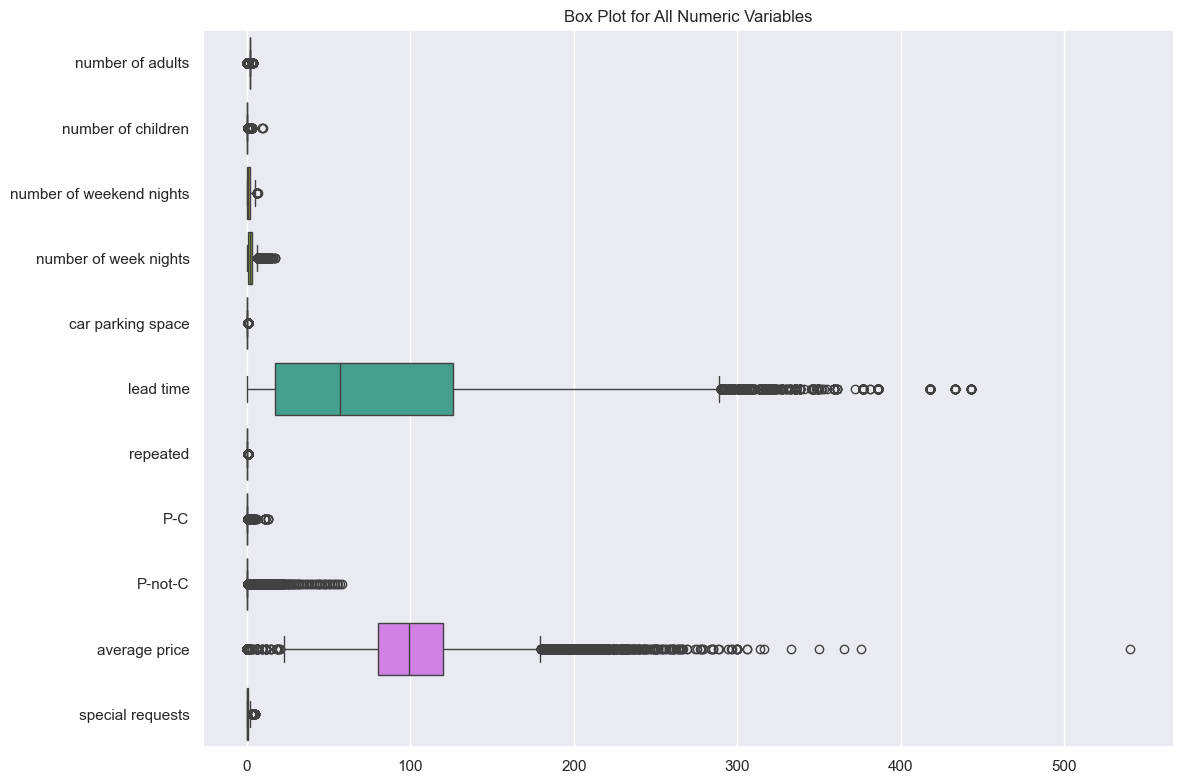

Shape of the data: (36285, 16)


In [35]:
plt.figure(figsize=(12, 8))
sns.set(style="darkgrid")

# Assuming 'df' is your DataFrame
sns.boxplot(data=df.select_dtypes('number'), orient="h")

plt.title("Box Plot for All Numeric Variables")
plt.tight_layout()
plt.show()

print("Shape of the data:", df.shape)


In [36]:
def whiskers(col):
    q1, q3 = np.percentile(col, [25, 75])
    iqr = q3-q1
    lw = q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw, uw

In [37]:
col = ["lead time", "average price"]
for i in col:
    lw, uw = whiskers(df[i])
    df[i] = np.where(df[i]<lw, lw, df[i])
    df[i] = np.where(df[i]>uw, uw, df[i])

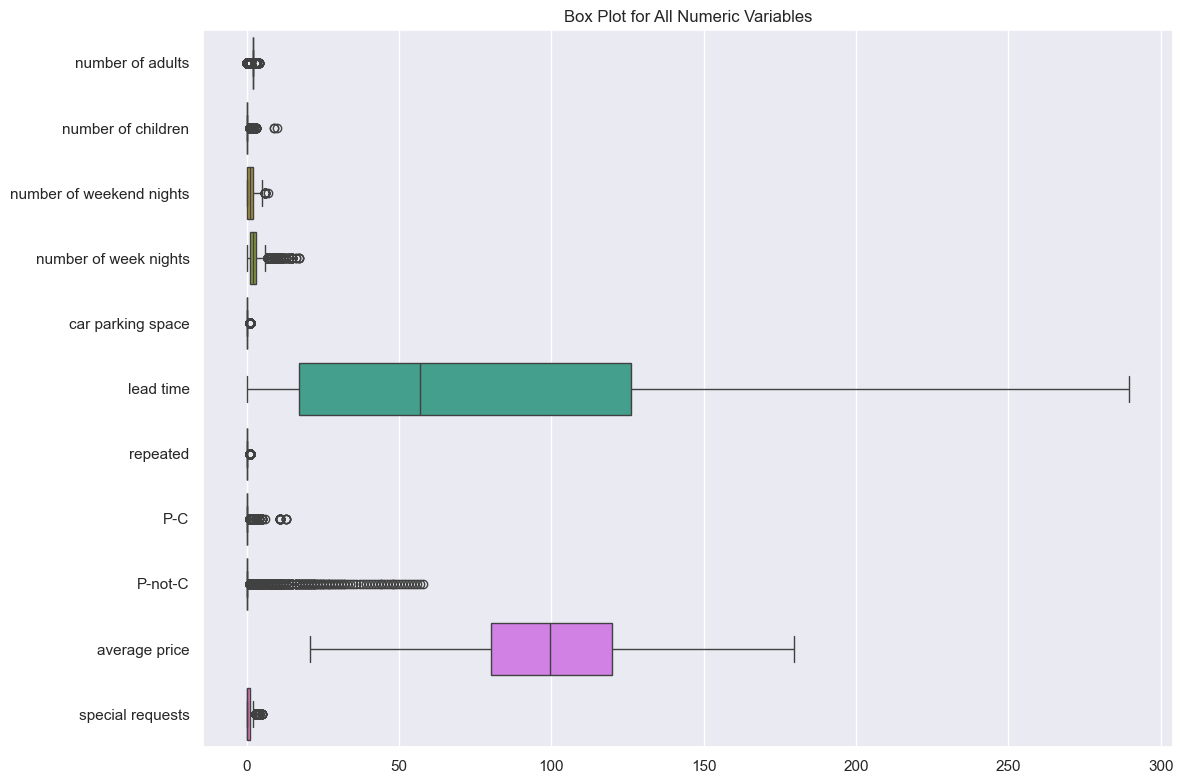

Shape of the data: (36285, 16)


In [38]:
plt.figure(figsize=(12, 8))
sns.set(style="darkgrid")

# Assuming 'df' is your DataFrame
sns.boxplot(data=df.select_dtypes('number'), orient="h")

plt.title("Box Plot for All Numeric Variables")
plt.tight_layout()
plt.show()

print("Shape of the data:", df.shape)


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number of adults          36285 non-null  int64  
 1   number of children        36285 non-null  int64  
 2   number of weekend nights  36285 non-null  int64  
 3   number of week nights     36285 non-null  int64  
 4   type of meal              36285 non-null  object 
 5   car parking space         36285 non-null  int64  
 6   room type                 36285 non-null  object 
 7   lead time                 36285 non-null  float64
 8   market segment type       36285 non-null  object 
 9   repeated                  36285 non-null  int64  
 10  P-C                       36285 non-null  int64  
 11  P-not-C                   36285 non-null  int64  
 12  average price             36285 non-null  float64
 13  special requests          36285 non-null  int64  
 14  date o

In [43]:
for i in df.select_dtypes("object").columns:
    print(df[i].value_counts())
    print("***"*10)

type of meal
Meal Plan 1     27842
Not Selected     5132
Meal Plan 2      3306
Meal Plan 3         5
Name: count, dtype: int64
******************************
room type
Room_Type 1    28138
Room_Type 4     6059
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64
******************************
market segment type
Online           23221
Offline          10531
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64
******************************
date of reservation
10/13/2018    254
10/16/2017    236
6/15/2018     231
6/24/2018     213
9/18/2017     201
             ... 
10/2/2015       1
7/24/2017       1
9/13/2016       1
5/20/2017       1
7/21/2017       1
Name: count, Length: 553, dtype: int64
******************************
booking status
Not_Canceled    24396
Canceled        11889
Name: count, dtype: int64
******************************


In [44]:
df.describe(include="object")

,type of meal,room type,market segment type,date of reservation,booking status
count,36285,36285,36285,36285,36285
unique,4,7,5,553,2
top,Meal Plan 1,Room_Type 1,Online,10/13/2018,Not_Canceled
freq,27842,28138,23221,254,24396


In [45]:
data = pd.get_dummies(data=df, columns=["type of meal", "room type", "market segment type", "booking status"], drop_first=True)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   number of adults                   36285 non-null  int64  
 1   number of children                 36285 non-null  int64  
 2   number of weekend nights           36285 non-null  int64  
 3   number of week nights              36285 non-null  int64  
 4   car parking space                  36285 non-null  int64  
 5   lead time                          36285 non-null  float64
 6   repeated                           36285 non-null  int64  
 7   P-C                                36285 non-null  int64  
 8   P-not-C                            36285 non-null  int64  
 9   average price                      36285 non-null  float64
 10  special requests                   36285 non-null  int64  
 11  date of reservation                36285 non-null  obj

In [53]:
data["date of reservation"]

0         10/2/2015
1         11/6/2018
2         2/28/2018
3         5/20/2017
4         4/11/2018
            ...    
36280     9/13/2018
36281    10/15/2017
36282    12/26/2018
36283      7/6/2018
36284    10/18/2018
Name: date of reservation, Length: 36285, dtype: object

In [55]:
data["date of reservation"] = pd.to_datetime(data["date of reservation"], errors="coerce")

data["year"] = data["date of reservation"].dt.year
data["month"] = data["date of reservation"].dt.month
data["day"] = data["date of reservation"].dt.day

In [57]:
data['date of reservation'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
36280    False
36281    False
36282    False
36283    False
36284    False
Name: date of reservation, Length: 36285, dtype: bool

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   number of adults                   36285 non-null  int64         
 1   number of children                 36285 non-null  int64         
 2   number of weekend nights           36285 non-null  int64         
 3   number of week nights              36285 non-null  int64         
 4   car parking space                  36285 non-null  int64         
 5   lead time                          36285 non-null  float64       
 6   repeated                           36285 non-null  int64         
 7   P-C                                36285 non-null  int64         
 8   P-not-C                            36285 non-null  int64         
 9   average price                      36285 non-null  float64       
 10  special requests                  

In [61]:
data.drop(columns=["date of reservation"], inplace=True)

In [63]:
df = data

In [65]:
df.isnull().sum()/df.shape[0]*100

number of adults                     0.000000
number of children                   0.000000
number of weekend nights             0.000000
number of week nights                0.000000
car parking space                    0.000000
lead time                            0.000000
repeated                             0.000000
P-C                                  0.000000
P-not-C                              0.000000
average price                        0.000000
special requests                     0.000000
type of meal_Meal Plan 2             0.000000
type of meal_Meal Plan 3             0.000000
type of meal_Not Selected            0.000000
room type_Room_Type 2                0.000000
room type_Room_Type 3                0.000000
room type_Room_Type 4                0.000000
room type_Room_Type 5                0.000000
room type_Room_Type 6                0.000000
room type_Room_Type 7                0.000000
market segment type_Complementary    0.000000
market segment type_Corporate     

In [67]:
df.dropna(subset=["year", "month", "day"], inplace=True)

In [69]:
df.head()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,...,room type_Room_Type 6,room type_Room_Type 7,market segment type_Complementary,market segment type_Corporate,market segment type_Offline,market segment type_Online,booking status_Not_Canceled,year,month,day
0,1,1,2,5,0,224.0,0,0,0,88.00,...,False,False,False,False,True,False,True,2015.0,10.0,2.0
1,1,0,1,3,0,5.0,0,0,0,106.68,...,False,False,False,False,False,True,True,2018.0,11.0,6.0
2,2,1,1,3,0,1.0,0,0,0,50.00,...,False,False,False,False,False,True,False,2018.0,2.0,28.0
3,1,0,0,2,0,211.0,0,0,0,100.00,...,False,False,False,False,False,True,False,2017.0,5.0,20.0
4,1,0,1,2,0,48.0,0,0,0,77.00,...,False,False,False,False,False,True,False,2018.0,4.0,11.0


In [71]:
df['day'] = df['day'].astype('int')
df['month'] = df['month'].astype('int')
df['year'] = df['year'].astype('int')


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36248 entries, 0 to 36284
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   number of adults                   36248 non-null  int64  
 1   number of children                 36248 non-null  int64  
 2   number of weekend nights           36248 non-null  int64  
 3   number of week nights              36248 non-null  int64  
 4   car parking space                  36248 non-null  int64  
 5   lead time                          36248 non-null  float64
 6   repeated                           36248 non-null  int64  
 7   P-C                                36248 non-null  int64  
 8   P-not-C                            36248 non-null  int64  
 9   average price                      36248 non-null  float64
 10  special requests                   36248 non-null  int64  
 11  type of meal_Meal Plan 2           36248 non-null  bool   


In [75]:
df.head()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,...,room type_Room_Type 6,room type_Room_Type 7,market segment type_Complementary,market segment type_Corporate,market segment type_Offline,market segment type_Online,booking status_Not_Canceled,year,month,day
0,1,1,2,5,0,224.0,0,0,0,88.00,...,False,False,False,False,True,False,True,2015,10,2
1,1,0,1,3,0,5.0,0,0,0,106.68,...,False,False,False,False,False,True,True,2018,11,6
2,2,1,1,3,0,1.0,0,0,0,50.00,...,False,False,False,False,False,True,False,2018,2,28
3,1,0,0,2,0,211.0,0,0,0,100.00,...,False,False,False,False,False,True,False,2017,5,20
4,1,0,1,2,0,48.0,0,0,0,77.00,...,False,False,False,False,False,True,False,2018,4,11


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36248 entries, 0 to 36284
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   number of adults                   36248 non-null  int64  
 1   number of children                 36248 non-null  int64  
 2   number of weekend nights           36248 non-null  int64  
 3   number of week nights              36248 non-null  int64  
 4   car parking space                  36248 non-null  int64  
 5   lead time                          36248 non-null  float64
 6   repeated                           36248 non-null  int64  
 7   P-C                                36248 non-null  int64  
 8   P-not-C                            36248 non-null  int64  
 9   average price                      36248 non-null  float64
 10  special requests                   36248 non-null  int64  
 11  type of meal_Meal Plan 2           36248 non-null  bool   


In [115]:
df.to_csv('cleaned_booking_data.csv', index=False)

<Axes: >

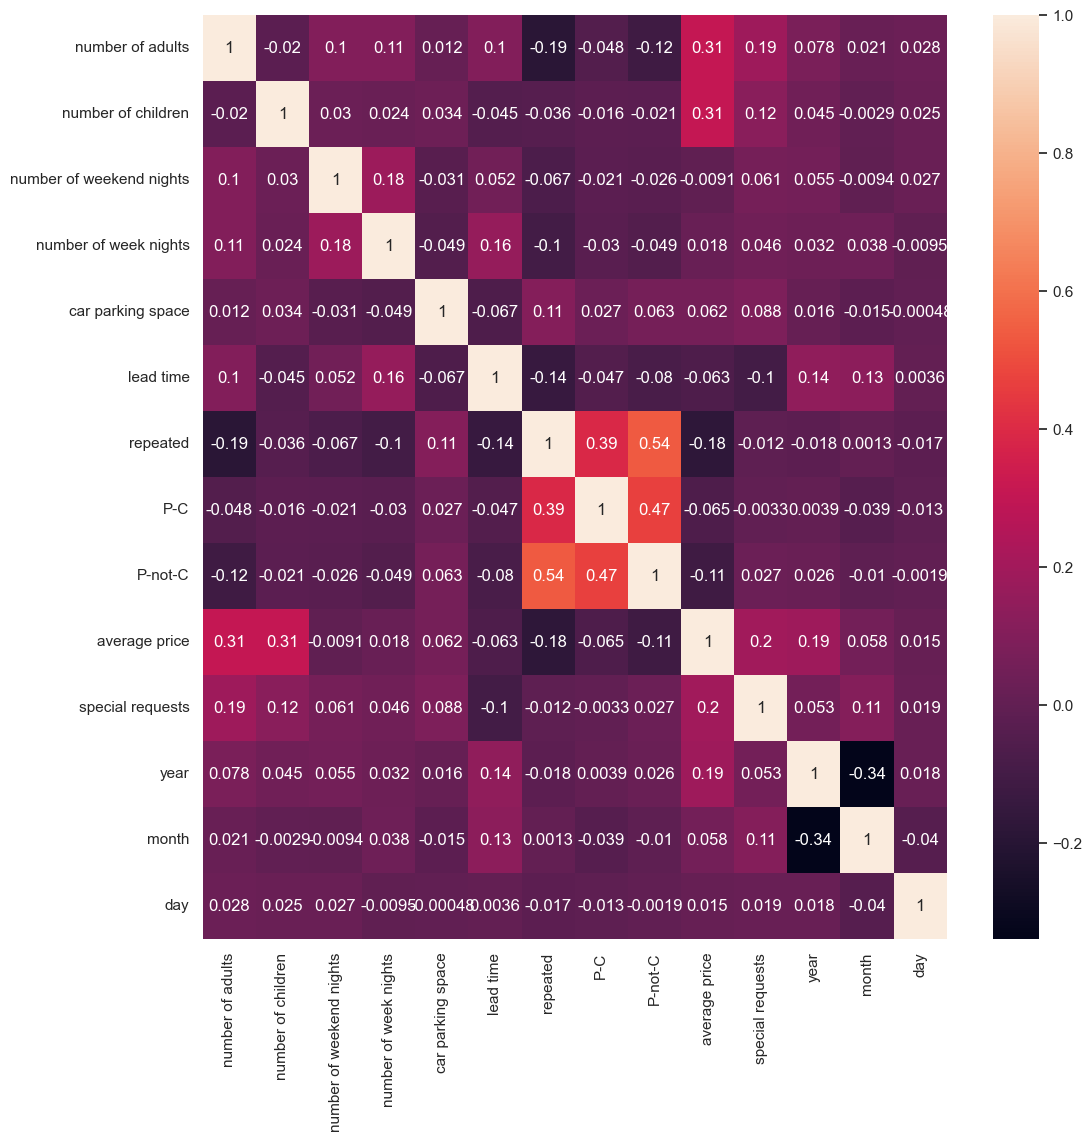

NameError: name 'df' is not defined